### The best model for predicting iris species from the iris dataset according to its accuracy

# imports

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import numpy as np

# Loading The Dataset and splitting it into training and testing sets

In [39]:
# Load dataset
data = load_iris()
X = data.data[:, 2:]  # Use only the last two features for visualization
real_X = data.data
y = data.target

# Split the dataset into training and testing sets
# We use real_X to decide the best model
real_X_train, real_X_test, y_train, y_test = train_test_split(real_X, y, test_size=0.2, random_state=42)
X_train  = real_X_train[:, 2:]
X_test = real_X_test[:, 2:]

In [40]:
# different metrics to use for KNN
metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'cosine']

# Test different values of k
k_values = range(1, 21)

# Store the different models for each metric
metrics_models = []

# Tuning Hyper Parameters

In [41]:
max_accuracy_all = 0
best_model_all = None

for metric in metrics:
    if metric == 'minkowski':
        p = 3
    else :
        # default value for p
        p = 2

    max_accuracy = 0
    best_model = None

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k , metric=metric, p=p)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if ( accuracy > max_accuracy):
            max_accuracy = accuracy
            best_model = knn
        print(f'k={k} metric={metric} p={p} accuracy={accuracy}')

    if (max_accuracy > max_accuracy_all):
        max_accuracy_all = max_accuracy
        best_model_all = best_model

k=1 metric=euclidean p=2 accuracy=1.0
k=2 metric=euclidean p=2 accuracy=0.9666666666666667
k=3 metric=euclidean p=2 accuracy=1.0
k=4 metric=euclidean p=2 accuracy=1.0
k=5 metric=euclidean p=2 accuracy=1.0
k=6 metric=euclidean p=2 accuracy=1.0
k=7 metric=euclidean p=2 accuracy=1.0
k=8 metric=euclidean p=2 accuracy=1.0
k=9 metric=euclidean p=2 accuracy=1.0
k=10 metric=euclidean p=2 accuracy=1.0
k=11 metric=euclidean p=2 accuracy=1.0
k=12 metric=euclidean p=2 accuracy=1.0
k=13 metric=euclidean p=2 accuracy=1.0
k=14 metric=euclidean p=2 accuracy=1.0
k=15 metric=euclidean p=2 accuracy=1.0
k=16 metric=euclidean p=2 accuracy=1.0
k=17 metric=euclidean p=2 accuracy=1.0
k=18 metric=euclidean p=2 accuracy=1.0
k=19 metric=euclidean p=2 accuracy=1.0
k=20 metric=euclidean p=2 accuracy=1.0
k=1 metric=manhattan p=2 accuracy=1.0
k=2 metric=manhattan p=2 accuracy=0.9666666666666667
k=3 metric=manhattan p=2 accuracy=1.0
k=4 metric=manhattan p=2 accuracy=1.0
k=5 metric=manhattan p=2 accuracy=1.0
k=6 metri

In [42]:
print(f'Best model: {best_model_all} with accuracy: {max_accuracy_all}')

Best model: KNeighborsClassifier(metric='euclidean', n_neighbors=1) with accuracy: 1.0


# Tuning Hyper Parameters (Better Approach)

In [43]:
# Define the parameter grid (different parameters for the SVM model to be tested) 
param_grid = {
    'n_neighbors': k_values,
    'metric': metrics,
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid)

# Fit Grid Search to the data and finding the best model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 1}
Best cross-validation score: 0.9583333333333334
Test set accuracy: 1.00


# Real data training

In [44]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid)

# Fit Grid Search to the data and finding the best model
grid_search.fit(real_X_train, y_train)

# Get the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(real_X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

Best parameters found: {'metric': 'cosine', 'n_neighbors': 3}
Best cross-validation score: 0.9833333333333332
Test set accuracy: 0.97


In [45]:
best_model_all = best_model

# print unique target values

In [46]:
print(np.unique(y))

[0 1 2]


# Let's Visualize the results

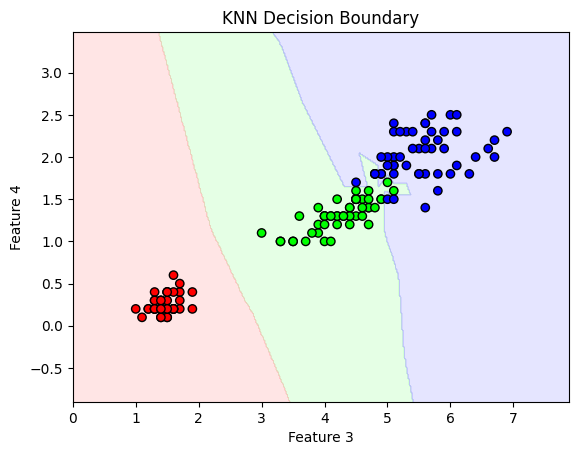

In [47]:
# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid on which we will run our model
all_x_values = np.arange(x_min, x_max, 0.02)
all_y_values = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(all_x_values, all_y_values)

# Predict the class for each point in the mesh grid and ignoring the first two features
flattened_xx = xx.ravel()
flattened_yy = yy.ravel()
Z = best_model_all.predict(np.c_[flattened_xx, flattened_yy])
Z = Z.reshape(xx.shape)

# print(Z.value_counts())

# Define colors for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_points)
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.title('KNN Decision Boundary')
plt.show()